In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [49]:
data = pd.read_csv('test_datasetOG.csv')
print(data.shape)
data.head()

(2278, 10)


,id,name,cost_price,selling_price,variant,stock,manufacture_date,expiry_date,best_before_months,expiry_in_months
0,0,Shampoo,179,189,340 ml,230,11-10-2020,12-10-2021,9,3
1,1,Body_Wash,200,360,800 ml,491,12-10-2020,13-10-2022,24,9
2,2,Oil,167,180,1 L,783,13-10-2020,14-10-2021,9,2
3,3,Besan,19,64,500 g,793,14-10-2020,15-10-2021,6,1
4,4,Colgate,75,99,10 g,817,15-10-2020,16-10-2022,24,3


In [41]:
x= data['expiry_in_months'].values
#y=data['selling_price'].values
print(x.shape)
print(y.shape,'y')

(2278,)
(976,) y


In [4]:
mean_x=np.mean(x)
mean_y=np.mean(y)

n= len(x)

num=0
den=0
for i in range(n):
    num +=(x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
b1= num/den
b0=mean_y-(b1*mean_x)

print(b1,b0)

3.114705502689951 265.31830587886293


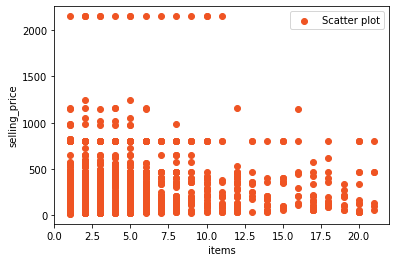

In [5]:
max_x =np.max(x)+100
min_x = np.min(x)-100

x1=np.linspace(min_x,max_x,1000)

y1=b0+b1*x

#plt.plot(x1,y1, colour='#58b970', label='Regression Line')
plt.scatter(x,y, color='#ef5423', label='Scatter plot')

plt.xlabel('items')
plt.ylabel('selling_price')
plt.legend()
plt.show()


In [52]:
data=data[pd.to_numeric(data['stock'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['cost_price'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['selling_price'], errors='coerce').notnull()]
#data=data[pd.to_numeric(data['variant'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['best_before_months'], errors='coerce').notnull()]
data=data[pd.to_numeric(data['expiry_in_months'], errors='coerce').notnull()]

data['variant']=data['variant'].apply(lambda x: re.sub("[^0-9]", "", str(x))) #remove non numeric parts

In [63]:
X=data.iloc[:,2:10]
X=X.drop(labels={'manufacture_date','expiry_date','selling_price'},axis=1)
y=data['selling_price']
display(y)

0       189
1       360
2       180
3        64
4        99
       ... 
1004    360
1005     50
1006    200
1007     20
1008    350
Name: selling_price, Length: 976, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [79]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
model.predict([[676,600,65,6,7],[150,600,6,12,7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([882.69674821, 203.30784089])